In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [ ]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cpu (from versions: 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.1.0+cu121.with.pypi.cudnn, 2.1.0+rocm5.5, 2.1.0+rocm5.6, 2.1.1, 2.1.1+cpu, 2.1.1+cpu.cxx11.abi, 2.1.1+cu118, 2.1.1+cu121, 2.1.1+cu121.with.pypi.cudnn, 2.1.1+rocm5.5, 2.1.1+rocm5.6, 2.1.2, 2.1.2+cpu, 2.1.2+cpu.cxx11.abi, 2.1.2+cu118, 2.1.2+cu121, 2.1.2+cu121.with.pypi.cudnn, 2.1.2+rocm5.5, 2.1.2+rocm5.6, 2.2.0, 2.2.0+cpu, 2.2.0+cpu.cxx11.abi, 2.2.0+cu118, 2.2.0+cu121, 2.2.0+rocm5.6, 2.2.0+r

In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
im_1_path = '/content/onl.jpg'

In [ ]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''

    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [ ]:
result = recognize_text(im_1_path)

In [ ]:
result

[([[989, 23], [1087, 23], [1087, 66], [989, 66]], 'ECG', 0.9956662850715886),
 ([[1101, 25], [1283, 25], [1283, 69], [1101, 69]],
  'REPORT',
  0.9995541393755446),
 ([[64, 70], [104, 70], [104, 98], [64, 98]], 'ID', 0.9989766593611439),
 ([[126, 68], [216, 68], [216, 100], [126, 100]],
  '161500',
  0.9996934360766296),
 ([[322, 68], [394, 68], [394, 98], [322, 98]], 'Years', 0.8016719125635648),
 ([[446, 70], [512, 70], [512, 100], [446, 100]], 'Male', 0.9973901878333588),
 ([[617, 77], [655, 77], [655, 97], [617, 97]], 'cm', 0.9998939601759326),
 ([[762, 72], [800, 72], [800, 104], [762, 104]], 'kg', 0.9999565047293953),
 ([[955, 69], [1045, 69], [1045, 105], [955, 105]],
  'mmHg',
  0.9999271035194397),
 ([[1094, 70], [1284, 70], [1284, 100], [1094, 100]],
  'Race:Unknown',
  0.998512179982134),
 ([[1332, 70], [1410, 70], [1410, 98], [1332, 98]],
  'Room',
  0.9999794363975525),
 ([[1418, 70], [1466, 70], [1466, 98], [1418, 98]],
  'No.=',
  0.2630893588066101),
 ([[1520, 68], [167

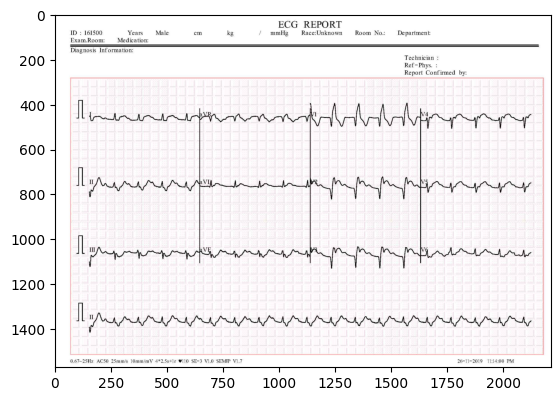

In [ ]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [ ]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''


    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    result = recognize_text(img_path)

    for (bbox, text, prob) in result:
        if prob >= 0.5:

            print(f'Detected text: {text} (Probability: {prob:.2f})')


            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)


            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)


    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_onl.jpg', bbox_inches='tight')

Detected text: ECG (Probability: 1.00)
Detected text: REPORT (Probability: 1.00)
Detected text: ID (Probability: 1.00)
Detected text: 161500 (Probability: 1.00)
Detected text: Years (Probability: 0.80)
Detected text: Male (Probability: 1.00)
Detected text: cm (Probability: 1.00)
Detected text: kg (Probability: 1.00)
Detected text: mmHg (Probability: 1.00)
Detected text: Race:Unknown (Probability: 1.00)
Detected text: Room (Probability: 1.00)
Detected text: Department: (Probability: 0.69)
Detected text: Exam Room: (Probability: 0.76)
Detected text: Medication: (Probability: 1.00)
Detected text: Diagnosis (Probability: 1.00)
Detected text: Inf ormation: (Probability: 0.75)
Detected text: Technician (Probability: 1.00)
Detected text: Ref-Phys. (Probability: 0.95)
Detected text: Report Conf irmed by: (Probability: 0.90)
Detected text: 0.67~2SHz (Probability: 0.85)
Detected text: 26-11-2019 (Probability: 1.00)
Detected text: 11:14.00 PM (Probability: 0.81)


<Figure size 640x480 with 0 Axes>

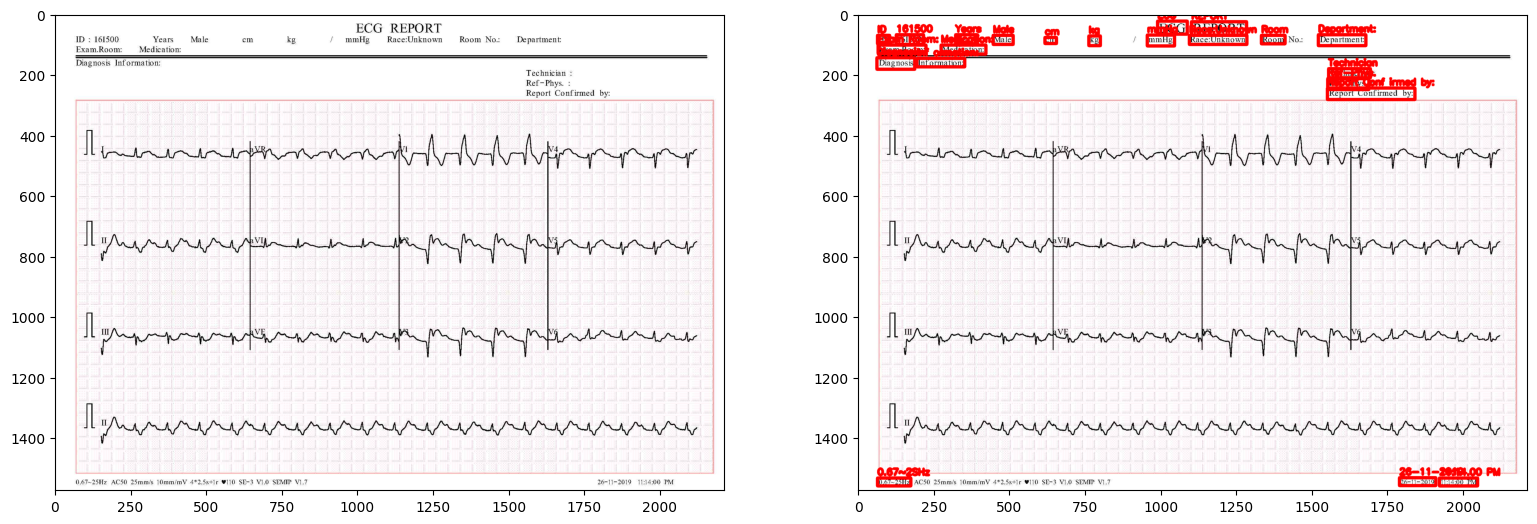

In [ ]:
overlay_ocr_text(im_1_path, 'onl')
